In [1]:
import numpy as np     
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import seaborn as sns 
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import string
import math
from sklearn.utils import shuffle

In [2]:
train_data=pd.read_csv(r'Corona_train.csv')
validation_data=pd.read_csv(r'Corona_validation.csv')
train_data=np.array(train_data)
validation_data=np.array(validation_data)

print(train_data.shape)
print(validation_data.shape)
X_train=train_data[:,2]
Y_train=train_data[:,1]
X_valid=validation_data[:,2]
Y_valid=validation_data[:,1]
print(Y_train.shape,type(Y_train),type(Y_train[0]))
print(Y_valid.shape,type(Y_valid),type(Y_train[0]))

(37864, 3)
(3293, 3)
(37864,) <class 'numpy.ndarray'> <class 'str'>
(3293,) <class 'numpy.ndarray'> <class 'str'>


In [3]:
n_train=Y_train.shape[0]
n_valid=Y_valid.shape[0]
for i in range(n_train):
    if(Y_train[i]=='Positive'):
        Y_train[i]=1
    if(Y_train[i]=='Neutral'):
        Y_train[i]=0
    if(Y_train[i]=='Negative'):
        Y_train[i]=-1
for i in range(n_valid):
    if(Y_valid[i]=='Positive'):
        Y_valid[i]=1
    if(Y_valid[i]=='Neutral'):
        Y_valid[i]=0
    if(Y_valid[i]=='Negative'):
        Y_valid[i]=-1
print(Y_train.shape,type(Y_train),type(Y_train[0]))

(37864,) <class 'numpy.ndarray'> <class 'int'>


In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(37864,)
(37864,)
(3293,)
(3293,)


In [5]:
def build_dictionary(X):
    dict=set()
    def build_dictionary(s):
        for j in s.lower().split():
            dict.add(j)
    for j in X:
        build_dictionary(j)
    dictionary=list(dict)
    dictionary.sort()
    indexed_dictionary={}
    for j in range(len(dictionary)):
        indexed_dictionary[dictionary[j]]=j
    return indexed_dictionary

In [6]:
indexed_dictionary=build_dictionary(X_train)
labels=[-1,0,1]
print(len(indexed_dictionary))

113583


In [7]:
def probability_word_cloud(X,Y,ind_dict,label):
    v=len(ind_dict)
    phi_jy=[[1]*v,[1]*v,[1]*v]
    denom=[v,v,v]
    word_cloud={-1:"",0:"",1:""}
    n=X.shape[0]
    for j in range(n):
        for k in X[j].lower().split():
            phi_jy[Y[j]+1][ind_dict[k]]+=1
        word_cloud[Y[j]]=word_cloud[Y[j]]+" "+X[j]
        denom[Y[j]+1]+=len(X[j].lower().split())
    for k in range(3):
        for j in range(v):
            phi_jy[k][j]/=denom[k]
    phi_y={}
    for j in label:
        b=np.sum(Y==j)
        phi_y[j]=(np.sum(Y==j))/n
    return phi_y, phi_jy, word_cloud

In [8]:
phi_y,phi_jy,word_cloud=probability_word_cloud(X_train,Y_train,indexed_dictionary,labels)
print(phi_y)

{-1: 0.37412845975068665, 0: 0.1874075639129516, 1: 0.4384639763363617}


In [9]:
def predict(X,prob_y,prob_jy,ind_dict):
    n=len(X)
    output=[]
    for i in range(n):
        temp_prob=-1e1000
        temp_label=-1
        for k in range(3):
            p=np.log(prob_y[k-1])
            for l in X[i].lower().split():
                if(l in ind_dict):
                    p+=np.log(prob_jy[k][ind_dict[l]])
            # print(p)
            if(temp_prob<p):
                temp_prob=p
                temp_label=k-1
        output.append(temp_label)
    return np.array(output)

In [10]:
Y_train_pred=predict(X_train,phi_y,phi_jy,indexed_dictionary)
Y_valid_pred=predict(X_valid,phi_y,phi_jy,indexed_dictionary)

In [11]:
Y_train_aslist=Y_train.tolist()
Y_train_pred_aslist=Y_train_pred.tolist()
Y_valid_aslist=Y_valid.tolist()
Y_valid_pred_aslist=Y_valid_pred.tolist()

In [12]:
train_accuracy = accuracy_score(Y_train_aslist, Y_train_pred_aslist)
print('pred_train_Accuracy:', train_accuracy)
valid_accuracy = accuracy_score(Y_valid_aslist, Y_valid_pred_aslist)
print('pred_valid_Accuracy:', valid_accuracy)


pred_train_Accuracy: 0.8438094231988168
pred_valid_Accuracy: 0.6774977224415427


In [13]:
for i in [-1,0,1]:
    temp_str=word_cloud[i]
    wc=WordCloud(
        background_color='white',
        height=600,
        width=400
    )
    wc.generate(temp_str)
    wc.to_file('word_cloud_for_class_{val}.png'.format(val=i))

In [14]:
random_predict_train=[0]*X_train.shape[0]
random_predict_valid=[0]*X_valid.shape[0]
for j in range(X_train.shape[0]):
    rand_pred=random.choice(labels)
    random_predict_train[j]=rand_pred
for j in range(X_valid.shape[0]):
    rand_pred=random.choice(labels)
    random_predict_valid[j]=rand_pred


positive_predict_train=[1]*X_train.shape[0]
positive_predict_valid=[1]*X_valid.shape[0]
train_random_accuracy = accuracy_score(random_predict_train, Y_train_aslist)
valid_random_accuracy = accuracy_score(random_predict_valid, Y_valid_aslist)
positive_train_accuracy = accuracy_score(positive_predict_train, Y_train_aslist)
positive_valid_accuracy = accuracy_score(positive_predict_valid, Y_valid_aslist)
print('Accuracy for random prediction of training data:', train_random_accuracy)
print('Accuracy for random prediction of validation data:', valid_random_accuracy)
print('Accuracy for positive prediction of training data:', positive_train_accuracy)
print('Accuracy for positive prediction of validation data:', positive_valid_accuracy)

Accuracy for random prediction of training data: 0.3350940207056835
Accuracy for random prediction of validation data: 0.34072274521712725
Accuracy for positive prediction of training data: 0.4384639763363617
Accuracy for positive prediction of validation data: 0.4385059216519891


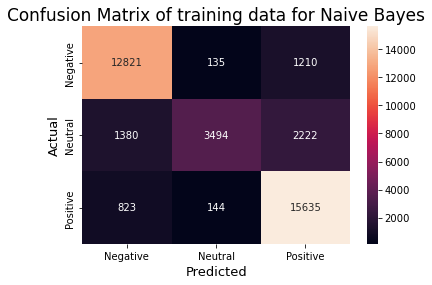

In [15]:
# compute the confusion matrix
cm = confusion_matrix(Y_train_aslist,Y_train_pred_aslist)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Negative', 'Neutral','Positive'],yticklabels=['Negative', 'Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix of training data for Naive Bayes',fontsize=17)
plt.show()
 

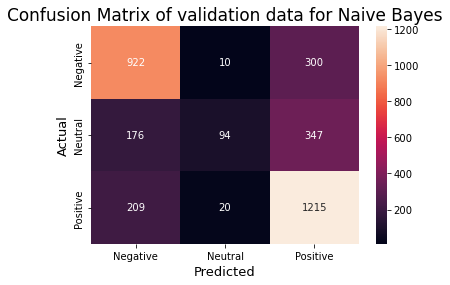

In [16]:
# compute the confusion matrix
cm = confusion_matrix(Y_valid_aslist, Y_valid_pred_aslist)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Negative', 'Neutral','Positive'],yticklabels=['Negative', 'Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix of validation data for Naive Bayes',fontsize=17)
plt.show()

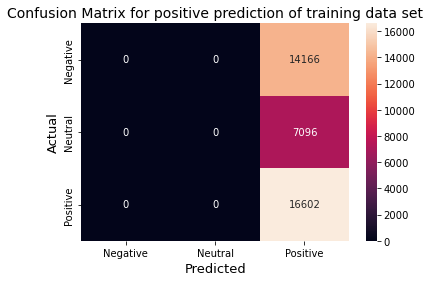

In [17]:
# compute the confusion matrix
cm = confusion_matrix(Y_train_aslist,positive_predict_train)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Negative', 'Neutral','Positive'],yticklabels=['Negative', 'Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix for positive prediction of training data set',fontsize=14)
plt.show()

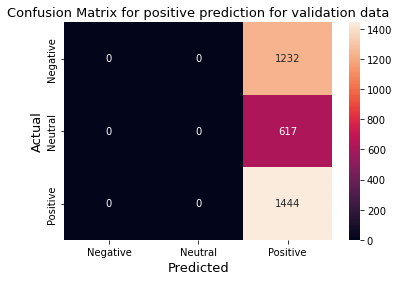

In [18]:
# compute the confusion matrix
cm = confusion_matrix(Y_valid_aslist,positive_predict_valid)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Negative', 'Neutral','Positive'],yticklabels=['Negative', 'Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix for positive prediction for validation data',fontsize=13)
plt.show()

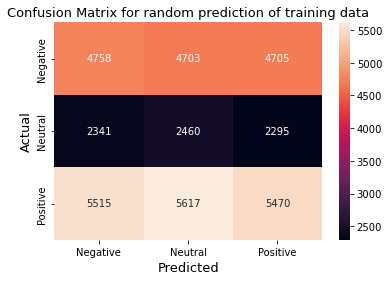

In [19]:
# compute the confusion matrix
cm = confusion_matrix(Y_train_aslist, random_predict_train)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Negative', 'Neutral','Positive'],yticklabels=['Negative', 'Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix for random prediction of training data',fontsize=13)
plt.show()

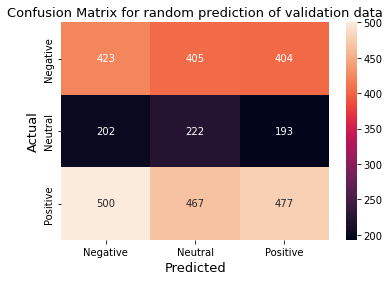

In [20]:
# compute the confusion matrix
cm = confusion_matrix(Y_valid_aslist, random_predict_valid)
 
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Negative', 'Neutral','Positive'],yticklabels=['Negative', 'Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix for random prediction of validation data',fontsize=13)
plt.show()

In [21]:
ps = PorterStemmer()
stopword=STOPWORDS

# Function to perform stemming and stop-word removal
def preprocess_text(text):
    words = [ps.stem(word) for word in text.lower().split() if word not in stopword]
    return ' '.join(words)

In [22]:
# # Apply preprocessing to training and validation data
stemed_training_data = [preprocess_text(text) for text in X_train]
stemed_validation_data = [preprocess_text(text) for text in X_valid]
stemed_training_data=np.array(stemed_training_data)
stemed_validation_data=np.array(stemed_validation_data)


In [23]:
stemed_indexed_dictionary=build_dictionary(stemed_training_data)
stemed_phi_y,stemed_phi_jy,stemed_word_cloud=probability_word_cloud(stemed_training_data,Y_train,stemed_indexed_dictionary,labels)

In [24]:
print(len(stemed_indexed_dictionary))
print(len(indexed_dictionary))

103815
113583


In [25]:
Y_train_stemed_pred=predict(stemed_training_data,stemed_phi_y,stemed_phi_jy,stemed_indexed_dictionary)
Y_valid_stemed_pred=predict(stemed_validation_data,stemed_phi_y,stemed_phi_jy,stemed_indexed_dictionary)

In [26]:
stemed_Y_train_pred_aslist=Y_train_stemed_pred.tolist()
stemed_Y_valid_pred_aslist=Y_valid_stemed_pred.tolist()
stemed_train_accuracy = accuracy_score(stemed_Y_train_pred_aslist, Y_train_aslist)
stemed_valid_accuracy = accuracy_score(stemed_Y_valid_pred_aslist, Y_valid_aslist)
print('stemed_train_Accuracy:', stemed_train_accuracy)
print('stemed_valid_Accuracy:', stemed_valid_accuracy)

stemed_train_Accuracy: 0.8475332769913374
stemed_valid_Accuracy: 0.6604919526267841


In [44]:
stopwords=STOPWORDS
print(len(stopwords))
for i in [-1,0,1]:
    temp_str=stemed_word_cloud[i]
    wc=WordCloud(
        background_color='white',
        stopwords=stopwords,
        height=600,
        width=400
    )
    wc.generate(temp_str)
    wc.to_file('stemed_word_cloud_for_class_{val}.png'.format(val=i))

192


In [28]:
def generate_bigrams(text):
    words = text.split()
    bigrams = [(words[i]+'-'+words[i+1]) for i in range(len(words) - 1)]
    return  text+' '+' '.join(bigrams)
bigram_X_train=np.array([generate_bigrams(text) for text in stemed_training_data])
bigram_X_valid=np.array([generate_bigrams(text) for text in stemed_validation_data])

In [29]:
bigram_indexed_dictionary=build_dictionary(bigram_X_train)
bigram_phi_y,bigram_phi_jy,bigram_word_cloud=probability_word_cloud(bigram_X_train,Y_train,bigram_indexed_dictionary,labels)

In [30]:
print(len(bigram_indexed_dictionary))
print(len(indexed_dictionary))

570745
113583


In [31]:
Y_train_bigram_pred=predict(bigram_X_train,bigram_phi_y,bigram_phi_jy,bigram_indexed_dictionary)
Y_valid_bigram_pred=predict(bigram_X_valid,bigram_phi_y,bigram_phi_jy,bigram_indexed_dictionary)

In [32]:
bigram_Y_train_pred_aslist=Y_train_bigram_pred.tolist()
bigram_Y_valid_pred_aslist=Y_valid_bigram_pred.tolist()
bigram_train_accuracy = accuracy_score(bigram_Y_train_pred_aslist, Y_train_aslist)
bigram_valid_accuracy = accuracy_score(bigram_Y_valid_pred_aslist, Y_valid_aslist)
print('bigram_train_Accuracy:', bigram_train_accuracy)
print('bigram_valid_Accuracy:', bigram_valid_accuracy)

bigram_train_Accuracy: 0.9621804352419184
bigram_valid_Accuracy: 0.657151533556028


In [33]:
def add_extract_pos_tags(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return text+' '+' '.join([tag for word, tag in pos_tags])

In [34]:
feature_add_X_train=np.array([add_extract_pos_tags(text) for text in stemed_training_data])
feature_add_X_valid=np.array([add_extract_pos_tags(text) for text in stemed_validation_data])

In [35]:
print(feature_add_X_train[0])

see kind academ alreadi whip #covid_19 relat projects, cfp, syllabi, articles, blog posts. iâm sittin brows food left &amp; tryin figur go back groceri store. appar donât well pandem VB NN JJ NN NN # NN JJ NNS , NN , NN , NNS , NN NNS . NN NN VBZ NN VBD CC NN : CC VB VB RB NN NN . NN NN RB RB


In [36]:
feature_add_indexed_dictionary=build_dictionary(feature_add_X_train)
feature_add_phi_y,feature_add_phi_jy,feature_add_word_cloud=probability_word_cloud(feature_add_X_train,Y_train,feature_add_indexed_dictionary,labels)

In [37]:
print(len(feature_add_indexed_dictionary))
print(len(indexed_dictionary))

103842
113583


In [38]:
Y_train_feature_add_pred=predict(feature_add_X_train,feature_add_phi_y,feature_add_phi_jy,feature_add_indexed_dictionary)
Y_valid_feature_add_pred=predict(feature_add_X_valid,feature_add_phi_y,feature_add_phi_jy,feature_add_indexed_dictionary)

In [39]:
feature_add_Y_train_pred_aslist=Y_train_feature_add_pred.tolist()
feature_add_Y_valid_pred_aslist=Y_valid_feature_add_pred.tolist()
feature_add_train_accuracy = accuracy_score(feature_add_Y_train_pred_aslist, Y_train_aslist)
feature_add_valid_accuracy = accuracy_score(feature_add_Y_valid_pred_aslist, Y_valid_aslist)
print('feature_add_train_Accuracy:', feature_add_train_accuracy)
print('feature_add_valid_Accuracy:', feature_add_valid_accuracy)

feature_add_train_Accuracy: 0.8258240016902598
feature_add_valid_Accuracy: 0.6638323716975403


In [40]:
percentage_of_target_data=[1,2,5,10,25,50,100]
combined_valid_accuracy=[]
target_valid_accuracy=[]

In [41]:
for i in percentage_of_target_data:
    X_training_data=stemed_training_data
    m=int((stemed_validation_data.shape[0]*i)/100)
    random_indices = np.random.choice(stemed_validation_data.shape[0], m, replace=False)
    X_target_data = stemed_validation_data[random_indices]
    Y_target_data = Y_valid[random_indices]

    X_combined=np.append(X_training_data,X_target_data,axis=0)
    Y_combined=np.append(Y_train,Y_target_data,axis=0)

    combined_indexed_dictionary=build_dictionary(X_combined)
    combined_phi_y, combined_phi_jy, combined_word_cloud=probability_word_cloud(X_combined,Y_combined,combined_indexed_dictionary,labels)

    target_indexed_dictionary=build_dictionary(X_target_data)
    target_phi_y, target_phi_jy, target_word_cloud=probability_word_cloud(X_target_data,Y_target_data, target_indexed_dictionary, labels)

    combined_valid_pred=predict(stemed_validation_data,combined_phi_y,combined_phi_jy,combined_indexed_dictionary)
    target_valid_pred=predict(stemed_validation_data,target_phi_y,target_phi_jy, target_indexed_dictionary)

    combined_valid_pred_aslist=combined_valid_pred.tolist()
    target_valid_pred_aslist=target_valid_pred.tolist()
    combined_accuracy = accuracy_score(combined_valid_pred_aslist, Y_valid_aslist)
    target_accuracy = accuracy_score(target_valid_pred_aslist, Y_valid_aslist)
    combined_valid_accuracy.append(combined_accuracy)
    target_valid_accuracy.append(target_accuracy)


In [42]:
for i, p in enumerate(percentage_of_target_data):
    print("size of training data in target domain(%) = {:.6f}, combined(source and target domain) accuracy= {:.4f}, target domain accuracy = {:.4f}".format(p, combined_valid_accuracy[i], target_valid_accuracy[i]))

size of training data in target domain(%) = 1.000000, combined(source and target domain) accuracy= 0.6608, target domain accuracy = 0.4282
size of training data in target domain(%) = 2.000000, combined(source and target domain) accuracy= 0.6611, target domain accuracy = 0.4880
size of training data in target domain(%) = 5.000000, combined(source and target domain) accuracy= 0.6669, target domain accuracy = 0.5269
size of training data in target domain(%) = 10.000000, combined(source and target domain) accuracy= 0.6778, target domain accuracy = 0.5752
size of training data in target domain(%) = 25.000000, combined(source and target domain) accuracy= 0.7109, target domain accuracy = 0.6742
size of training data in target domain(%) = 50.000000, combined(source and target domain) accuracy= 0.7565, target domain accuracy = 0.7674
size of training data in target domain(%) = 100.000000, combined(source and target domain) accuracy= 0.8482, target domain accuracy = 0.9198


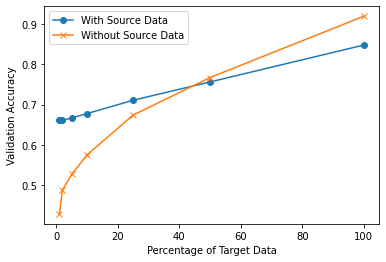

In [43]:
# Plot the results
plt.plot(percentage_of_target_data,  combined_valid_accuracy, label="With Source Data",marker='o')
plt.plot(percentage_of_target_data, target_valid_accuracy, label="Without Source Data",marker='x')
plt.xlabel("Percentage of Target Data")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()